# Análise Exploratória e Preditiva de Dados - Desafio

## 1. Introdução

Este notebook apresenta a análise exploratória do dataset `dados_desafio.xlsx`, com o objetivo de compreender a estrutura dos dados, identificar padrões, possíveis problemas e preparar o caminho para etapas futuras de modelagem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

## 2. Carregamento dos Dados

Os dados foram carregados a partir de um arquivo Excel utilizando a biblioteca `pandas`

In [2]:
df = pd.read_excel("../data/dados_desafio.xlsx")

## 3. Análise Inicial

- Análise das primeiras linhas do dataframe

In [3]:
df.head()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
0,05d5a67b06f86425711075939a164657,credit_card,1,18.38,716c95338343be76a421f05145f6d9b7,delivered,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,2017-11-06,5064d6d99510e06a10487f7773f79060,4,2017-10-27,2017-10-27 17:13:20.000,2a592642399b33baf3a5729a6335b21c,b83cedfb587e7911540e3f576d6917ce,2017-10-30 09:28:15.000,9.99,7.78,perfumaria,100.00,16.00,7.00,12.00,4870,sao paulo,SP,b4acaca510f847f9927914b51f9b0874,9861,sao bernardo do campo,SP
1,b1f9820e61b6a6a7643c961eaf4f217d,credit_card,1,28.23,6e550daa4d9d07414a598ee4682289a0,delivered,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,2018-05-07,f86e7499e15b26ac97f22354ef917bd1,5,2018-04-17,2018-04-18 12:46:56.986,499a1638595575721fec87dbaa05f339,25cf099de44674fde97473224f9d59ab,2018-04-13 18:31:31.987,10.00,18.23,automotivo,350.00,20.00,15.00,15.00,6716,cotia,SP,9abf4d8d20ca191ce59eb6227cf53d6d,38270,campina verde,MG
2,b27f6a3ed9bfe29879c912b10bcf081b,credit_card,9,92.57,dd774d127953e12f6953a9d36e6a3cc4,delivered,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,2018-01-24,a5fc2433140223de219d3fcfc548f3ff,4,2018-01-17,2018-01-22 10:00:16.963,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2018-01-08 20:50:16.022,79.00,13.57,papelaria,"7,000.00",60.00,20.00,30.00,13232,campo limpo paulista,SP,dc446a1ea0c8cc3eb1cd31896f6cf00f,12919,braganca paulista,SP
3,a182c021b0561e70031de925b3991fb3,credit_card,4,176.99,1d93c38087f43927ad29cdbd73a1a01b,delivered,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,2018-04-25,bdd2176b8d0ed0d5414dc07547720dd2,5,2018-04-12,2018-04-16 12:09:10.022,6f3b5b605d91b7439c5e3f5a8dffeea7,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-06 20:35:17.030,158.00,18.99,relogios_presentes,335.00,17.00,11.00,16.00,14840,guariba,SP,14691264ea396cd3bd71ebbe36bc6771,29278,arace,ES
4,8e76f4ac6aee1d6013e40279de68a7cf,credit_card,10,110.56,e085989aa21e36b90469d6940aefe23c,delivered,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,2017-08-31,44b50a1399e3b7c7b553984d2151fbc4,4,2017-08-16,2017-08-17 00:34:48.979,8cbd33515c33f6bc2042660baff504b5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-10 18:10:09.034,40.18,15.10,moveis_decoracao,650.00,50.00,7.00,33.00,14940,ibitinga,SP,06c211500493e0aa2c584346c15a1d81,95770,feliz,RS


- Análise das últimas linhas do dataframe

In [4]:
df.tail()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
112487,b0e9288a209f5ec50391c140dba4c91f,credit_card,1,36.13,e1ccb7645c1d9af9b91b6d521e0ba64a,delivered,2018-08-25 07:32:24.979,2018-08-25 07:45:07.978,2018-08-27 20:03:00.029,2018-08-30 21:16:34.032,2018-09-14,02d00568beb770ce3939f4fca60556a1,5,2018-08-31,2018-09-05 22:33:44.035,94a6c010ef78e62cab34c6caf0a69b5f,080102cd0a76b09e0dcf55fcacc60e05,2018-08-28 07:45:07.978,17.90,18.23,consoles_games,100.00,20.00,3.00,15.00,31140,belo horizonte,MG,d2ac08ce3b32b9dc32acb436d25a1ad8,13690,descalvado,SP
112488,5f5d82c66499b9a72f7e8071477aee00,credit_card,1,21.77,2e3a0d5dfa1d77144e41d8219fd8934f,delivered,2017-10-31 19:33:20.016,2017-10-31 19:47:42.979,2017-11-01 18:33:02.016,2017-11-03 16:29:53.002,2017-11-10,21069ffcc48500dad15f6b8fc51aff19,4,2017-11-04,2017-11-06 19:41:29.040,1c9b5793de6c3d9117b6218552c87a8f,3c7c4a49ec3c6550809089c6a2ca9370,2017-11-07 19:47:09.024,13.99,7.78,perfumaria,50.00,16.00,5.00,11.00,3804,sao paulo,SP,6db83e5c493613ba8f9d4ddeb3af9bcf,9910,diadema,SP
112489,b857ab4fe30b0d1e9eaa0922b8a8d364,credit_card,2,227.66,98d3c3f34ca9bbb7c3a7e69d626b90a0,delivered,2018-05-18 19:56:54.038,2018-05-18 20:17:29.040,2018-05-29 14:10:00.019,2018-06-12 20:11:51.994,2018-07-03,ae9d19f932d50181e0b07daaa5c4963a,5,2018-06-13,2018-06-16 00:16:45.005,b5841e1059b5b0513b7f03b6646e7229,cee48807215b30a12ca2ca10ffb5f250,2018-06-04 20:17:29.040,199.90,27.76,automotivo,"2,550.00",35.00,20.00,20.00,11431,guaruja,SP,97b27e8f7862217bae2f5bbc66e15b77,22720,rio de janeiro,RJ
112490,df8f138cbe59c7bb4454c61d1223ca18,credit_card,8,134.13,d77f3797ee0abe8fc7d85e9610400958,delivered,2018-06-01 15:09:59.962,2018-06-01 15:31:49.958,2018-07-04 06:38:00.010,2018-07-05 19:51:34.963,2018-07-19,0216b7c032381d8491f94dc6be0fc0af,4,2018-07-06,2018-07-07 22:46:13.987,e0d64dcfaa3b6db5c54ca298ae101d05,2eb70248d66e0e3ef83659f71b244378,2018-06-27 15:31:38.035,124.90,9.23,relogios_presentes,"4,338.00",17.00,12.00,14.00,13101,campinas,SP,9751244bd65fd1f1166ab7f3e10a31ab,13284,vinhedo,SP
112491,8811b551e13f7f1be237272ebb8c30cb,credit_card,1,48.13,caa4f57153e47838c4335d18d96bdc38,delivered,2018-03-08 00:01:28.042,2018-03-08 00:16:10.013,2018-03-08 16:38:49.027,2018-04-02 20:39:21.974,2018-03-27,670a07360a960498c53f343ece011d64,1,2018-03-29,2018-03-29 12:40:02.006,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-14 00:16:10.013,29.90,18.23,beleza_saude,250.00,16.00,5.00,15.00,13405,piracicaba,SP,a883e6b329b7f56b2b99309d6eb181cf,34018,nova lima,MG


- Quantidade de linhas e colunas

In [5]:
df.shape

(112492, 32)

- Inspeção dos tipos de dado de cada coluna

In [6]:
df.dtypes

id_pedido                          object
tipo_pagamento                     object
prestacoes                          int64
valor_pagamento                   float64
id_cliente                         object
status_pedido                      object
data_hora_pedido           datetime64[ns]
pedido_aprovado            datetime64[ns]
pedido_com_entregador      datetime64[ns]
pedido_entregue            datetime64[ns]
tempo_entregue_estimado    datetime64[ns]
id_avaliacao                       object
score_avaliacao                     int64
data_avaliacao             datetime64[ns]
data_resposta_avaliacao    datetime64[ns]
id_item                            object
id_vendedor                        object
data_limite_entrega        datetime64[ns]
preco                             float64
valor_frete                       float64
categoria_produto                  object
peso_produto                      float64
comprimento_produto               float64
altura_produto                    

- Verifica informações sobre o arquivo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112492 entries, 0 to 112491
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id_pedido                112492 non-null  object        
 1   tipo_pagamento           112492 non-null  object        
 2   prestacoes               112492 non-null  int64         
 3   valor_pagamento          112492 non-null  float64       
 4   id_cliente               112492 non-null  object        
 5   status_pedido            112492 non-null  object        
 6   data_hora_pedido         112492 non-null  datetime64[ns]
 7   pedido_aprovado          112477 non-null  datetime64[ns]
 8   pedido_com_entregador    111312 non-null  datetime64[ns]
 9   pedido_entregue          110129 non-null  datetime64[ns]
 10  tempo_entregue_estimado  112492 non-null  datetime64[ns]
 11  id_avaliacao             112492 non-null  object        
 12  score_avaliacao 

- Verificação de colunas com dados faltantes

In [8]:
df.isnull().sum()

id_pedido                     0
tipo_pagamento                0
prestacoes                    0
valor_pagamento               0
id_cliente                    0
status_pedido                 0
data_hora_pedido              0
pedido_aprovado              15
pedido_com_entregador      1180
pedido_entregue            2363
tempo_entregue_estimado       0
id_avaliacao                  0
score_avaliacao               0
data_avaliacao             4632
data_resposta_avaliacao    4632
id_item                       0
id_vendedor                   0
data_limite_entrega           0
preco                         0
valor_frete                   0
categoria_produto          1620
peso_produto                 18
comprimento_produto          18
altura_produto               18
largura_produto              18
cep_vendedor                  0
cidade_vendedor               0
estado_vendedor               0
id_unica_cliente              0
cep_cliente                   0
cidade_cliente                0
estado_c

- Contagem de valores únicos por coluna

In [9]:
unique_counts = df.nunique().sort_values()
unique_counts

tipo_pagamento                 4
score_avaliacao                5
status_pedido                  7
estado_vendedor               23
prestacoes                    24
estado_cliente                27
categoria_produto             73
largura_produto               95
comprimento_produto           99
altura_produto               102
tempo_entregue_estimado      446
cidade_vendedor              603
data_avaliacao               631
peso_produto                2183
cep_vendedor                2232
id_vendedor                 3064
cidade_cliente              4063
preco                       5846
valor_frete                 6908
cep_cliente                14790
valor_pagamento            28331
id_item                    31951
pedido_com_entregador      77831
pedido_aprovado            86554
data_limite_entrega        89465
data_resposta_avaliacao    90891
pedido_entregue            91637
data_hora_pedido           94135
id_pedido                  94385
id_cliente                 94385
id_unica_c

## Conversão de CEPs

- As colunas `cep_vendedor` e `cep_cliente` foram convertidas para string, pois CEPs são identificadores e não devem ser tratados como variáveis numéricas


In [10]:
df['cep_vendedor'] = df['cep_vendedor'].astype(str)
df['cep_cliente'] = df['cep_cliente'].astype(str)

## 4. Visualização das Variáveis

### Variáveis Numéricas

- Seleção de variáveis numéricas e remoção de `score_avaliacao` delas

In [11]:
numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_variables.remove('score_avaliacao')

In [12]:
numerical_variables

['prestacoes',
 'valor_pagamento',
 'preco',
 'valor_frete',
 'peso_produto',
 'comprimento_produto',
 'altura_produto',
 'largura_produto']

- Estatísticas de variáveis numéricas

In [13]:
df[numerical_variables].describe()

,prestacoes,valor_pagamento,preco,valor_frete,peso_produto,comprimento_produto,altura_produto,largura_produto
count,"112,492.00","112,492.00","112,492.00","112,492.00","112,474.00","112,474.00","112,474.00","112,474.00"
mean,2.92,172.13,121.25,20.06,"2,115.40",30.24,16.65,23.07
std,2.76,267.55,184.61,15.92,"3,787.44",16.18,13.49,11.76
min,0.00,0.00,0.85,0.00,0.00,7.00,2.00,6.00
25%,1.00,60.70,39.90,13.08,300.00,18.00,8.00,15.00
50%,2.00,108.10,74.99,16.31,700.00,25.00,13.00,20.00
75%,4.00,188.89,134.90,21.19,"1,800.00",38.00,20.00,30.00
max,24.00,"13,664.08","6,735.00",409.68,"40,425.00",105.00,105.00,118.00


- Quantidade de observações por prestações

In [14]:
df.groupby(['prestacoes']).size()

prestacoes
0         3
1     56224
2     13209
3     11297
4      7648
5      5707
6      4389
7      1733
8      4811
9       679
10     6390
11       22
12      157
13       17
14       14
15       81
16        7
17        7
18       38
20       19
21        4
22        1
23        1
24       34
dtype: int64

- O gráfico de barras foi escolhido para melhor visualização da frequência de cada valor

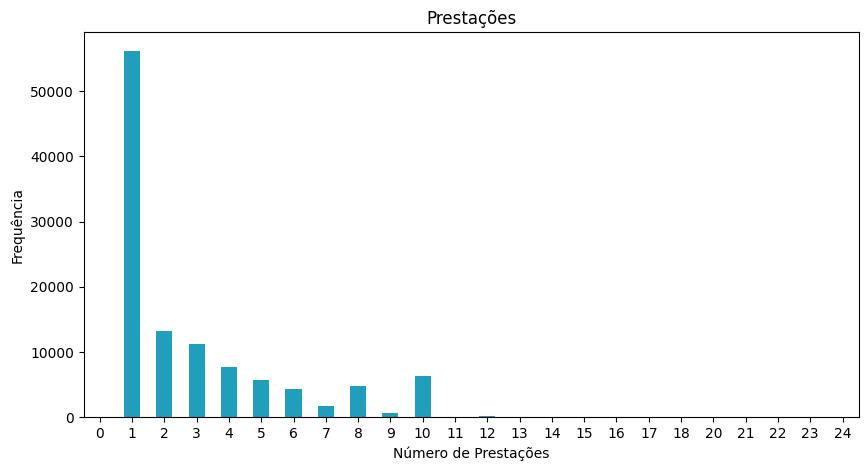

In [15]:
plt.figure(figsize=(10, 5))
df['prestacoes'].value_counts().sort_index().plot(kind='bar', color='#219ebc')
plt.title('Prestações')
plt.xlabel('Número de Prestações')
plt.ylabel('Frequência')
plt.xticks(rotation=0);

- Quantidade de observações por valor de pagamento

In [16]:
df['valor_pagamento'].size

112492

- O boxplot foi escolhido para a visualização já que temos muitos valores únicos para essa variável numérica, e assim já é possível identificar assimetrias e possíveis outliers

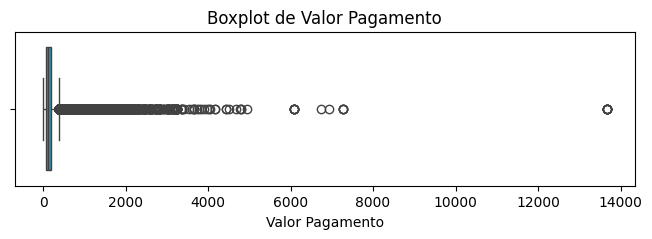

In [17]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['valor_pagamento'], color='#219ebc')
plt.title('Boxplot de Valor Pagamento')
plt.xlabel('Valor Pagamento');

- Quantidade de observações por preço

In [18]:
df['preco'].size

112492

- Visualização através de boxplot

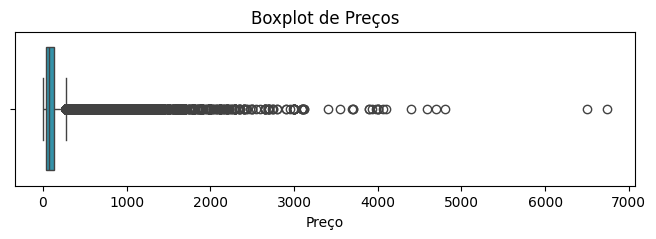

In [19]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['preco'], color='#219ebc')
plt.title('Boxplot de Preços')
plt.xlabel('Preço');

- Quantidade de observações por valor de frete

In [20]:
df['valor_frete'].size

112492

- Visualização através de boxplot

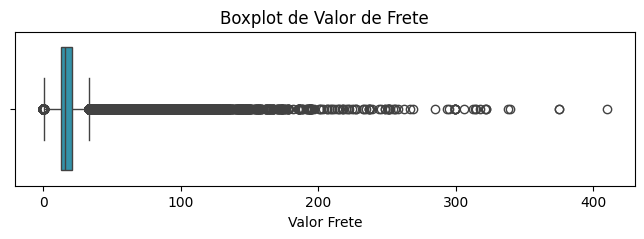

In [21]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['valor_frete'], color='#219ebc')
plt.title('Boxplot de Valor de Frete')
plt.xlabel('Valor Frete');

- Quantidade de observações por peso de produto

In [22]:
df['peso_produto'].size

112492

- Visualização em boxplot

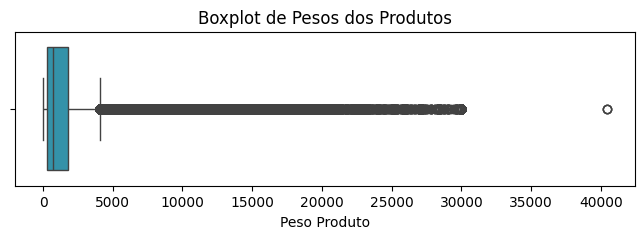

In [23]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['peso_produto'], color='#219ebc')
plt.title('Boxplot de Pesos dos Produtos')
plt.xlabel('Peso Produto');

- Quantidade de observações por comprimento de produto

In [24]:
df['comprimento_produto'].size

112492

- Visualização em histograma

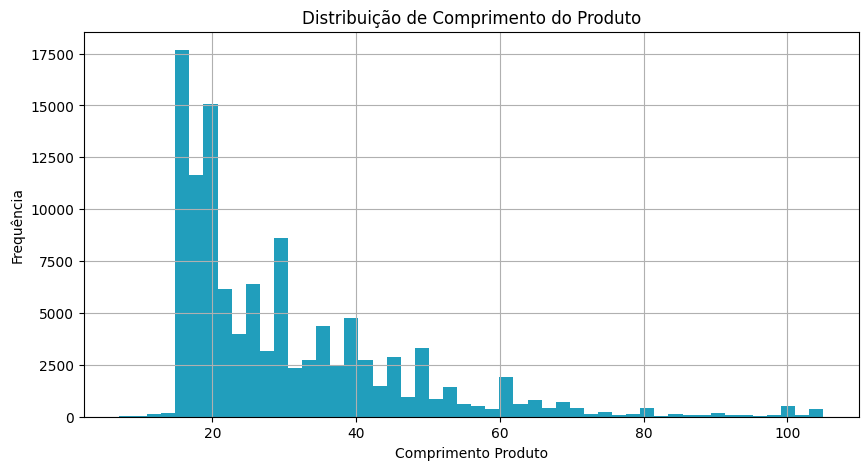

In [25]:
plt.figure(figsize=(10, 5))
df['comprimento_produto'].hist(bins=50, color='#219ebc')
plt.title('Distribuição de Comprimento do Produto')
plt.xlabel('Comprimento Produto')
plt.ylabel('Frequência');

- Quantidade de observações por altura de produto

In [26]:
df['altura_produto'].size

112492

- Visualização em histograma

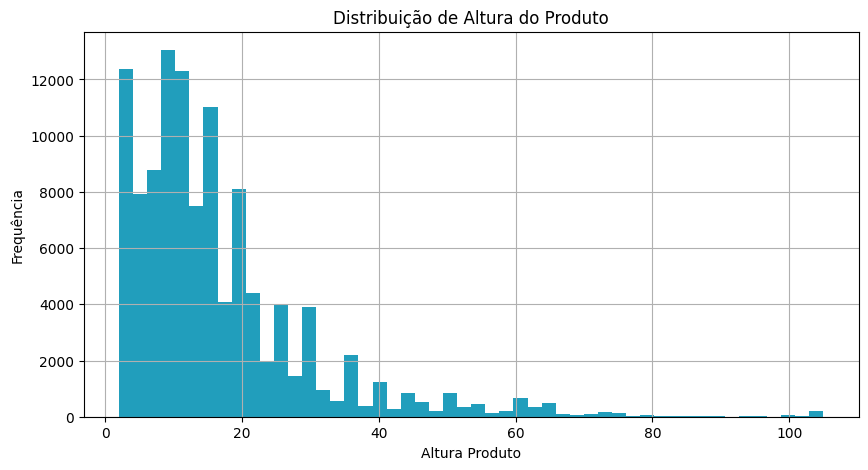

In [27]:
plt.figure(figsize=(10, 5))
df['altura_produto'].hist(bins=50, color='#219ebc')
plt.title('Distribuição de Altura do Produto')
plt.xlabel('Altura Produto')
plt.ylabel('Frequência');

- Observações por largura de produto

In [28]:
df['largura_produto'].size

112492

- Visualização em histograma

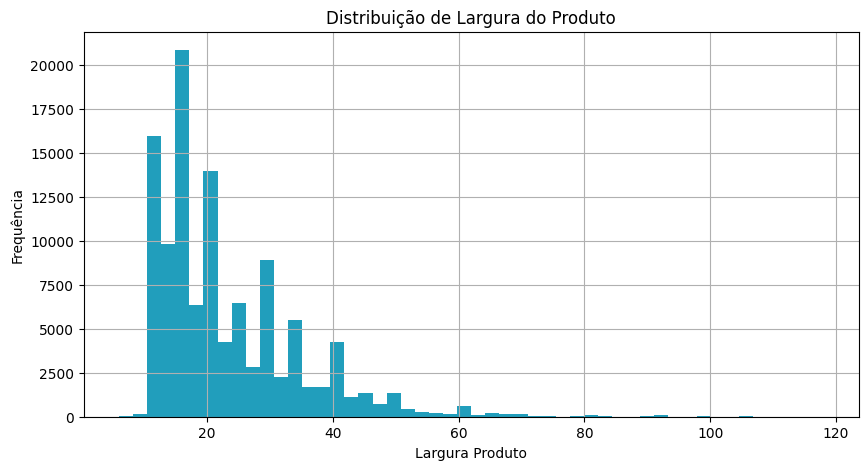

In [29]:
plt.figure(figsize=(10, 5))
df['largura_produto'].hist(bins=50, color='#219ebc')
plt.title('Distribuição de Largura do Produto')
plt.xlabel('Largura Produto')
plt.ylabel('Frequência');

## Discussão sobre escolhas de plots

A escolha do tipo de gráfico para cada variável foi feita considerando a natureza dos dados e o objetivo de obter uma visão inicial clara da distribuição de cada atributo. O gráfico de barras foi utilizado para a variável `prestacoes`, que tem poucos valores únicos, pois esse tipo de plot facilita a visualização da frequência de cada categoria, permitindo identificar rapidamente padrões ou valores mais comuns.
O boxplot foi escolhido para variáveis contínuas com muitos valores únicos, como `valor_pagamento`, `preco`, `valor_frete` e `peso_produto`, já que é eficiente para visualizar a mediana, a dispersão dos dados e possíveis outliers.
Já o histograma foi utilizado para variáveis contínuas relacionadas a dimensões de produtos (`comprimento_produto`, `altura_produto`, `largura_produto`), pois ele permite observar a distribuição dos dados ao longo de intervalos, facilitando a identificação de assimetrias, concentrações e possíveis anomalias.

## Variáveis Categóricas

### Identificação de Variáveis Categóricas
- Inicialmente, foram consideradas como candidatas a categóricas as variáveis com até 20 valores únicos

In [30]:
categorical_candidates = unique_counts[unique_counts <= 20].index.tolist()

In [31]:
categorical_candidates

['tipo_pagamento', 'score_avaliacao', 'status_pedido']

- Complementarmente, variáveis do tipo `object` ou que representam categorias relevantes para o negócio foram incluídas manualmente

In [32]:
categorical_manual = [
    'categoria_produto',
    'cidade_cliente',
    'estado_cliente',
]
categorical_variables = list(set(categorical_candidates + categorical_manual))

- O critério misto (automático + manual) foi adotado para garantir que variáveis importantes não fossem descartadas apenas pelo número de categorias

In [33]:
categorical_variables

['score_avaliacao',
 'cidade_cliente',
 'tipo_pagamento',
 'estado_cliente',
 'status_pedido',
 'categoria_produto']

- Quantidade de observações por Cidade do Cliente

In [34]:
df['cidade_cliente'].size

112492

- Visualização através do gráfico

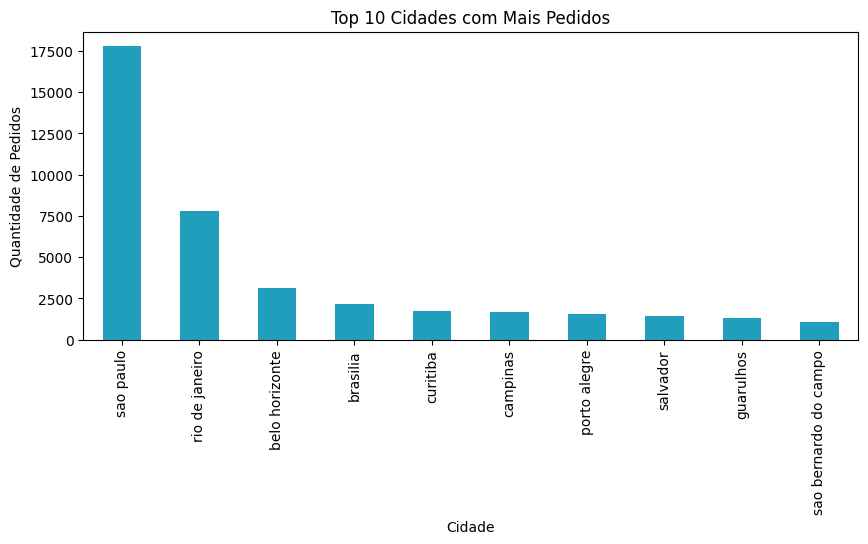

In [35]:
top_cidades = df['cidade_cliente'].value_counts().head(10)

plt.figure(figsize=(10, 4))
top_cidades.plot(kind='bar', color='#219ebc')
plt.title('Top 10 Cidades com Mais Pedidos')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Pedidos');

- Quantidade de observações por Estado do Cliente

In [36]:
df.groupby(['estado_cliente']).size()

estado_cliente
AC       89
AL      442
AM      164
AP       82
BA     3856
CE     1505
DF     2200
ES     2224
GO     2320
MA      808
MG    13102
MS      825
MT     1076
PA     1070
PB      606
PE     1812
PI      552
PR     5719
RJ    14600
RN      551
RO      262
RR       50
RS     6224
SC     4123
SE      377
SP    47523
TO      330
dtype: int64

- Visualização através do gráfico

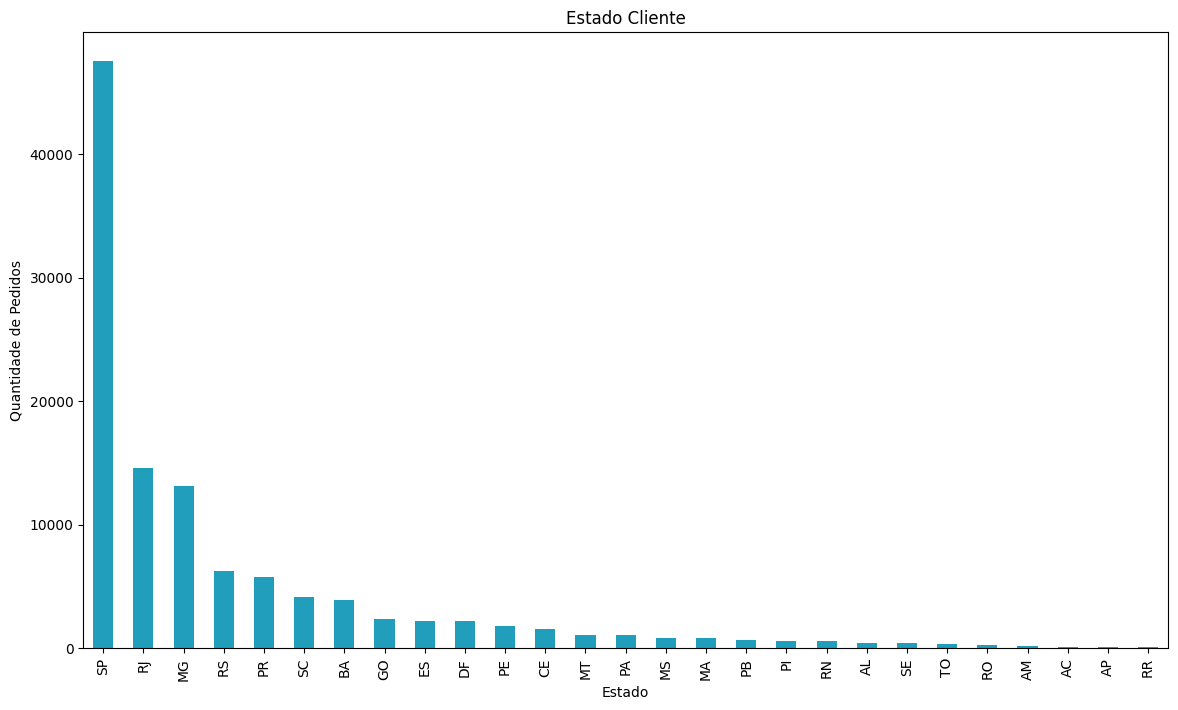

In [37]:
plt.figure(figsize=(14, 8))
df['estado_cliente'].value_counts().plot(kind='bar', color='#219ebc')
plt.title('Estado Cliente')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pedidos');

- Quantidade de observações por Categoria de Produto

In [38]:
df['categoria_produto'].size

112492

- Visualização das categorias mais frequentes em gráfico

Text(0, 0.5, 'Quantidade de Pedidos')

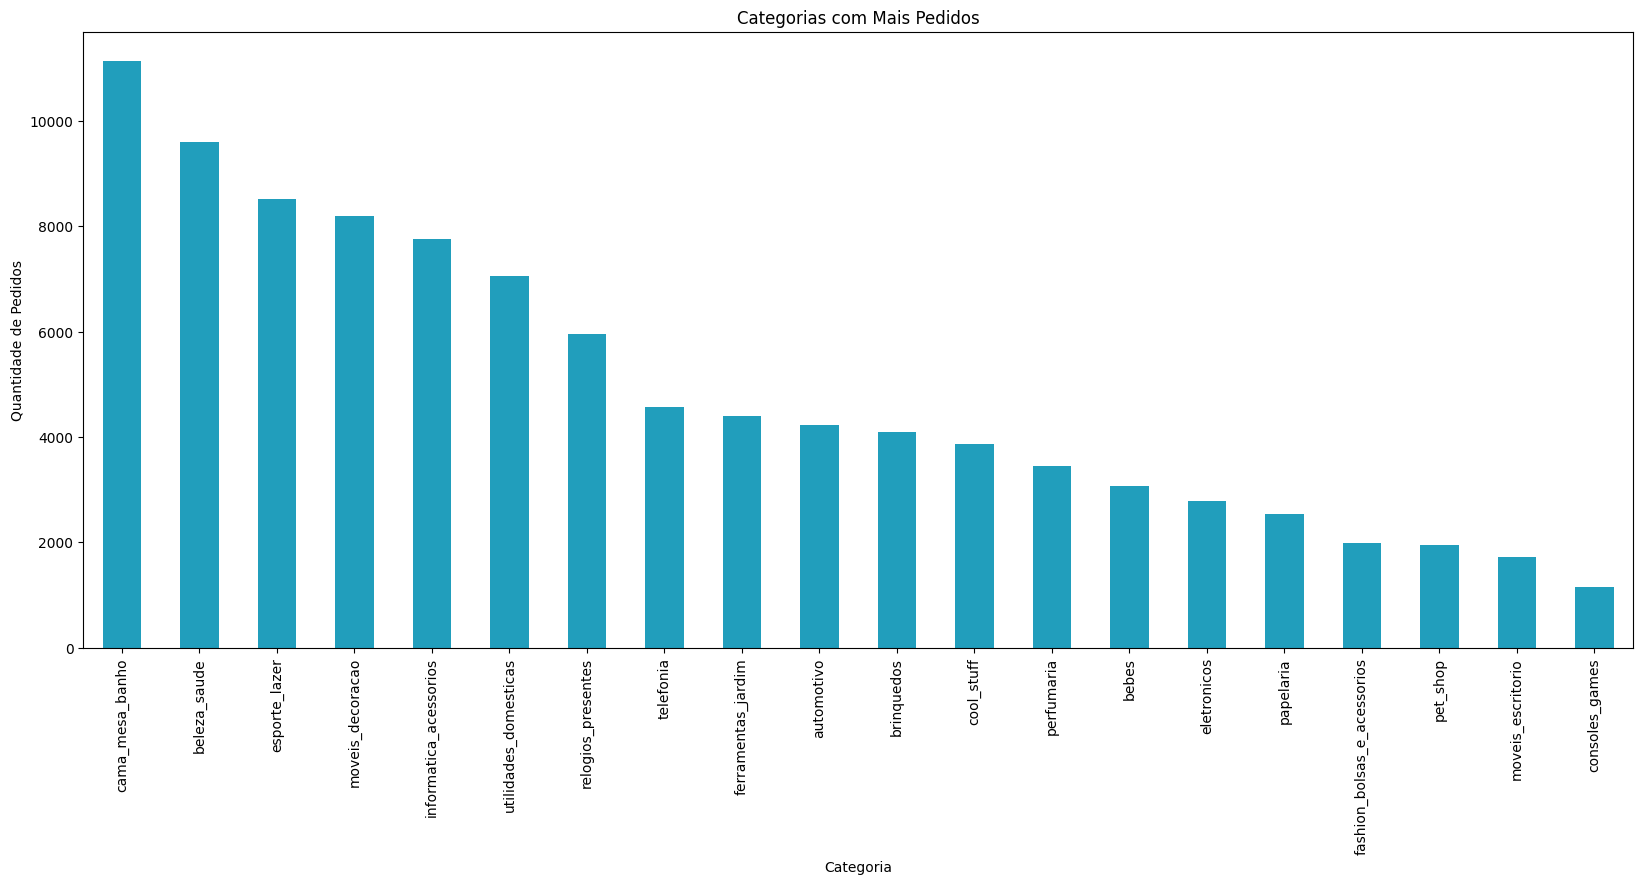

In [39]:
top_categorias = df['categoria_produto'].value_counts().head(20)

plt.figure(figsize=(20, 8))
top_categorias.plot(kind='bar', color='#219ebc')
plt.title('Categorias com Mais Pedidos')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Pedidos')

- Quantidade de observações por Status do Pedido

In [40]:
df.groupby(['status_pedido']).size()

status_pedido
approved            3
canceled          527
delivered      110130
invoiced          348
processing        362
shipped          1115
unavailable         7
dtype: int64

- Visuualização em gráfico

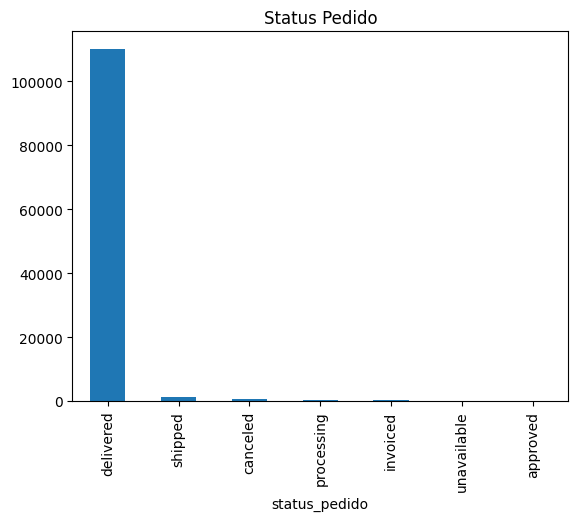

In [41]:
df.status_pedido.value_counts().plot(kind='bar', title='Status Pedido');

- Quantidade de observações por Tipo de Pagamento

In [42]:
df.groupby(['tipo_pagamento']).size()

tipo_pagamento
boleto         21899
credit_card    83009
debit_card      1640
voucher         5944
dtype: int64

- Visualização em gráfico

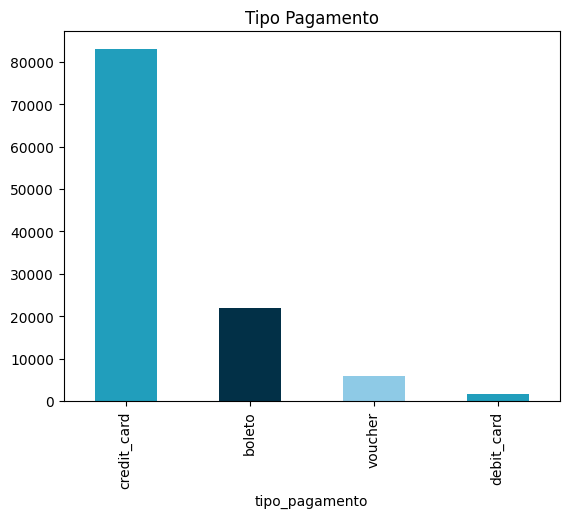

In [43]:
df.tipo_pagamento.value_counts().plot(kind='bar', title='Tipo Pagamento',color = ['#219ebc', '#023047', '#8ecae6']);

- Quantidade de observações por Score das Avaliações (Variável Alvo)

In [44]:
df.groupby(['score_avaliacao']).size()

score_avaliacao
1    14283
2     3895
3     9463
4    21434
5    63417
dtype: int64

- Visualização em gráfico

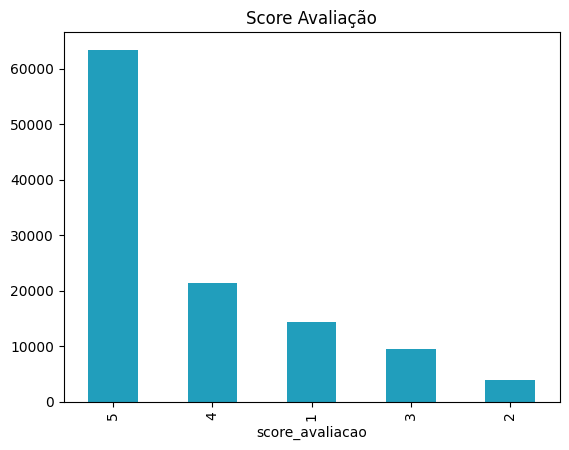

In [45]:
df.score_avaliacao.value_counts().plot(kind='bar', title='Score Avaliação',color = ['#219ebc']);

## Discussão sobre a escolha da Variável Alvo
A variável `score_avaliacao` foi escolhida como alvo dentro desse projeto por refletir diretamente a experiência do cliente. Dentro desse conjunto de dados, a definição de sucesso está associada a avaliações positivas após o recebimento do pedido. Cabe ressaltar a relevância da variável `status_pedido`, que também indica o sucesso na realização de uma compra e é pré-requisito para uma avaliação positiva. No entanto, `status_pedido` está mais relacionada a aspectos operacionais e logísticos, que fogem ao escopo principal deste modelo, voltado para a experiência do cliente. Dessa forma, as análises realizadas a partir deste ponto terão como foco a variável `score_avaliacao`, buscando levantar insights sobre os fatores que influenciam a satisfação do cliente.


# Analisando variaveis categóricas em relação a variável alvo

- Formatação do tamanho do plot

In [46]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True

- Exibe a variável `cidade_cliente` x `score_avaliacao` (cidades com maiores ocorrências de compras)

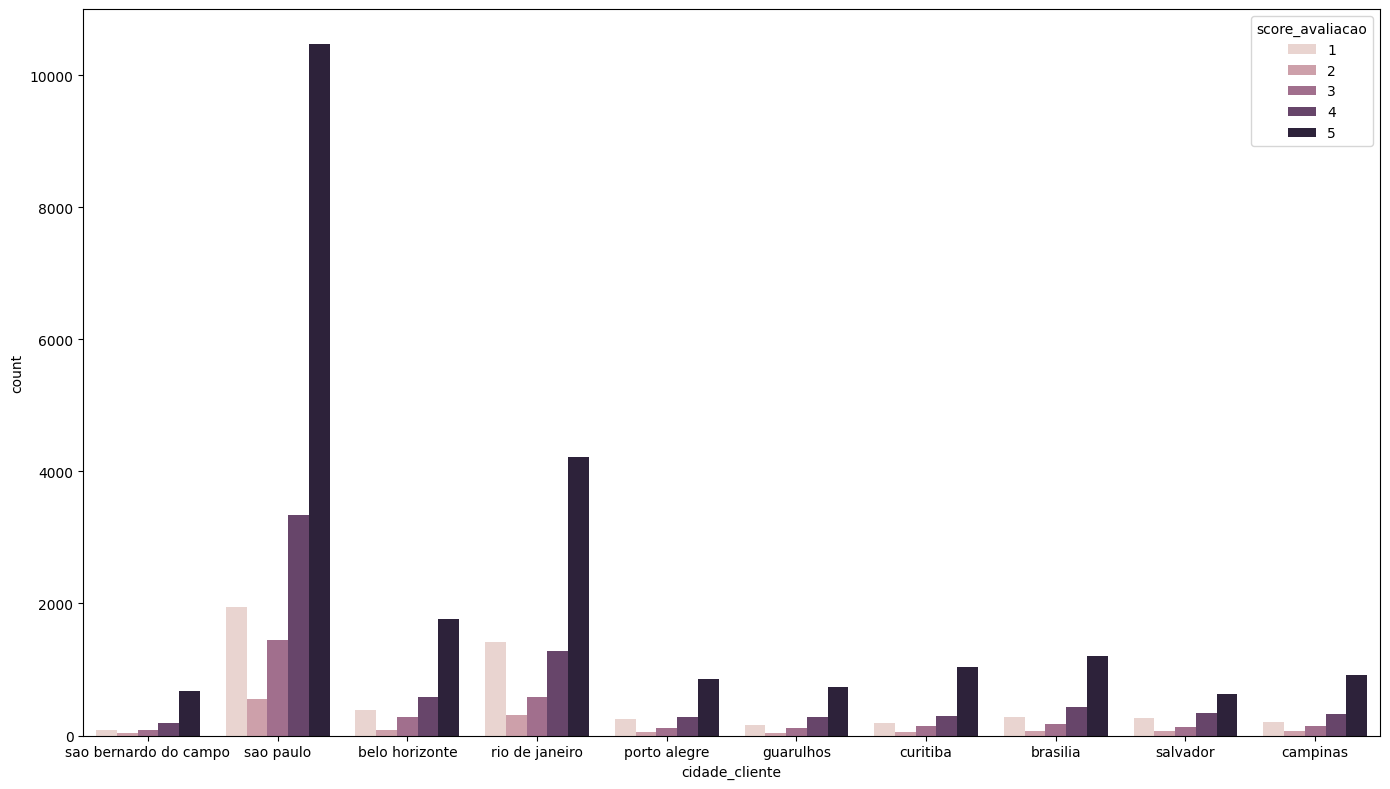

In [47]:
top_cidades = df['cidade_cliente'].value_counts().head(10).index
df_top_cidades = df[df['cidade_cliente'].isin(top_cidades)]
sns.countplot(data = df_top_cidades, x = "cidade_cliente", hue = "score_avaliacao");

- Exibe a variável `estado_cliente` x `score_avaliacao`

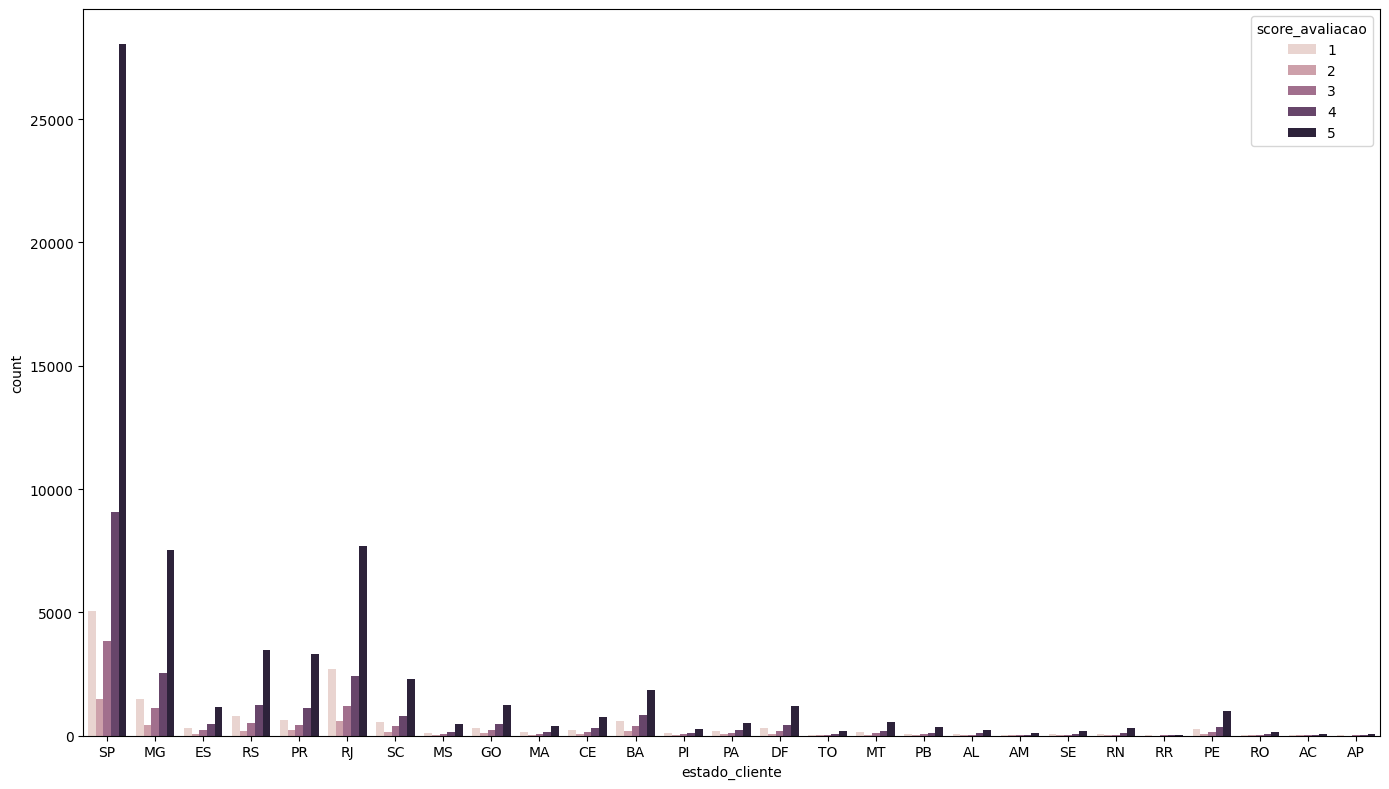

In [48]:
sns.countplot(data = df, x = "estado_cliente", hue = "score_avaliacao");

- Exibe a variável `categoria_produto` x `score_avaliacao` (top 8 categorias mais frequentes)

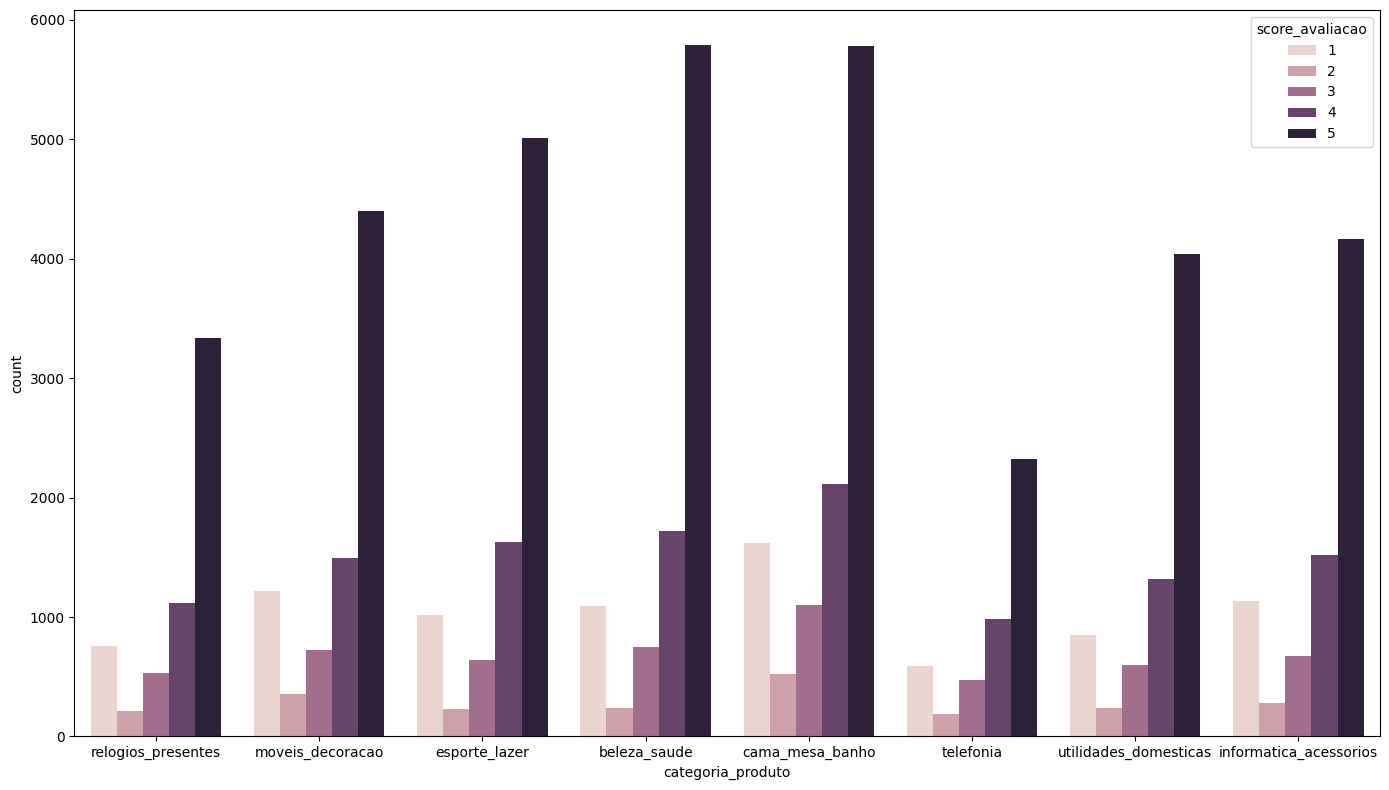

In [49]:
top_categorias = df['categoria_produto'].value_counts().head(8).index
df_top_categorias = df[df['categoria_produto'].isin(top_categorias)]
sns.countplot(data = df_top_categorias, x = "categoria_produto", hue = "score_avaliacao");

- Exibe a variável `status_pedido` x `score_avaliacao`

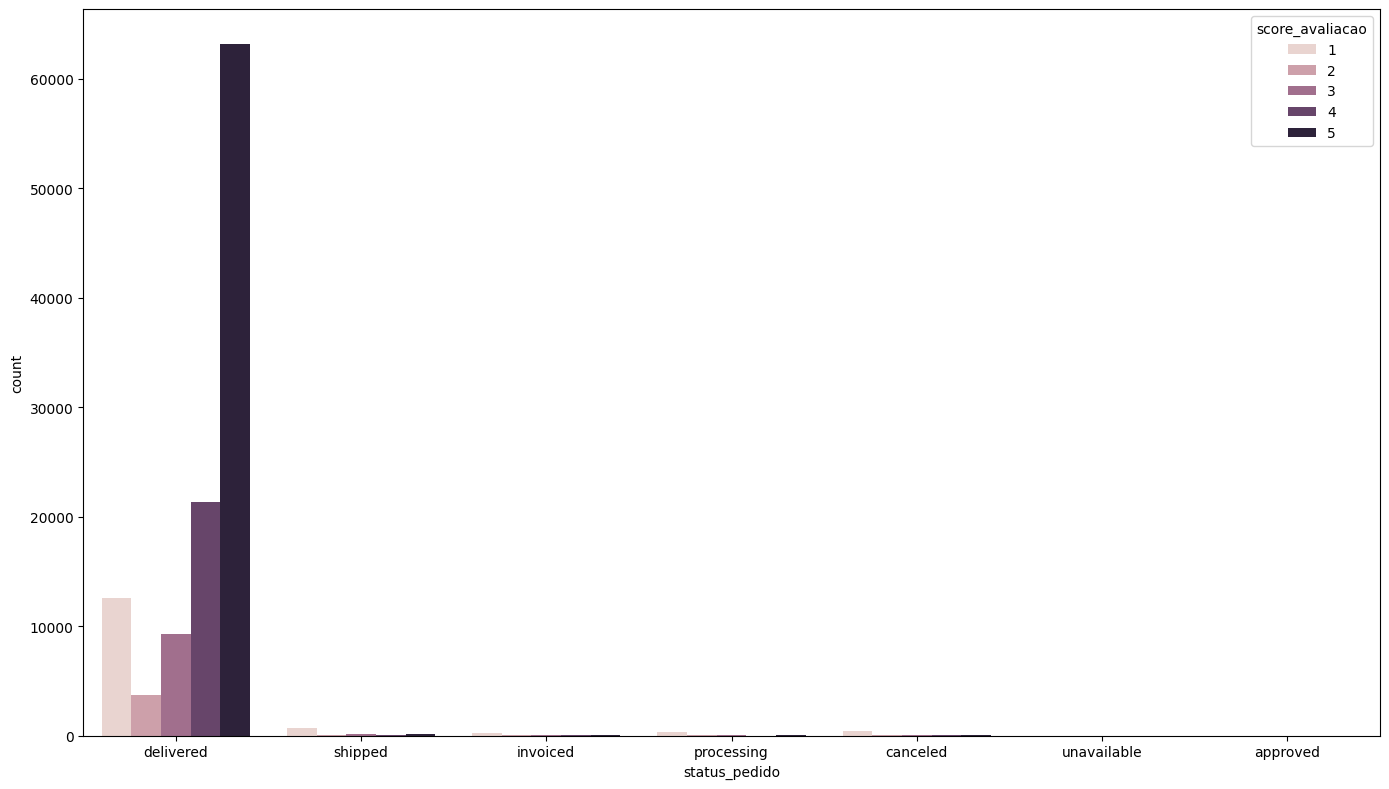

In [50]:
sns.countplot(data = df, x = "status_pedido", hue = "score_avaliacao");

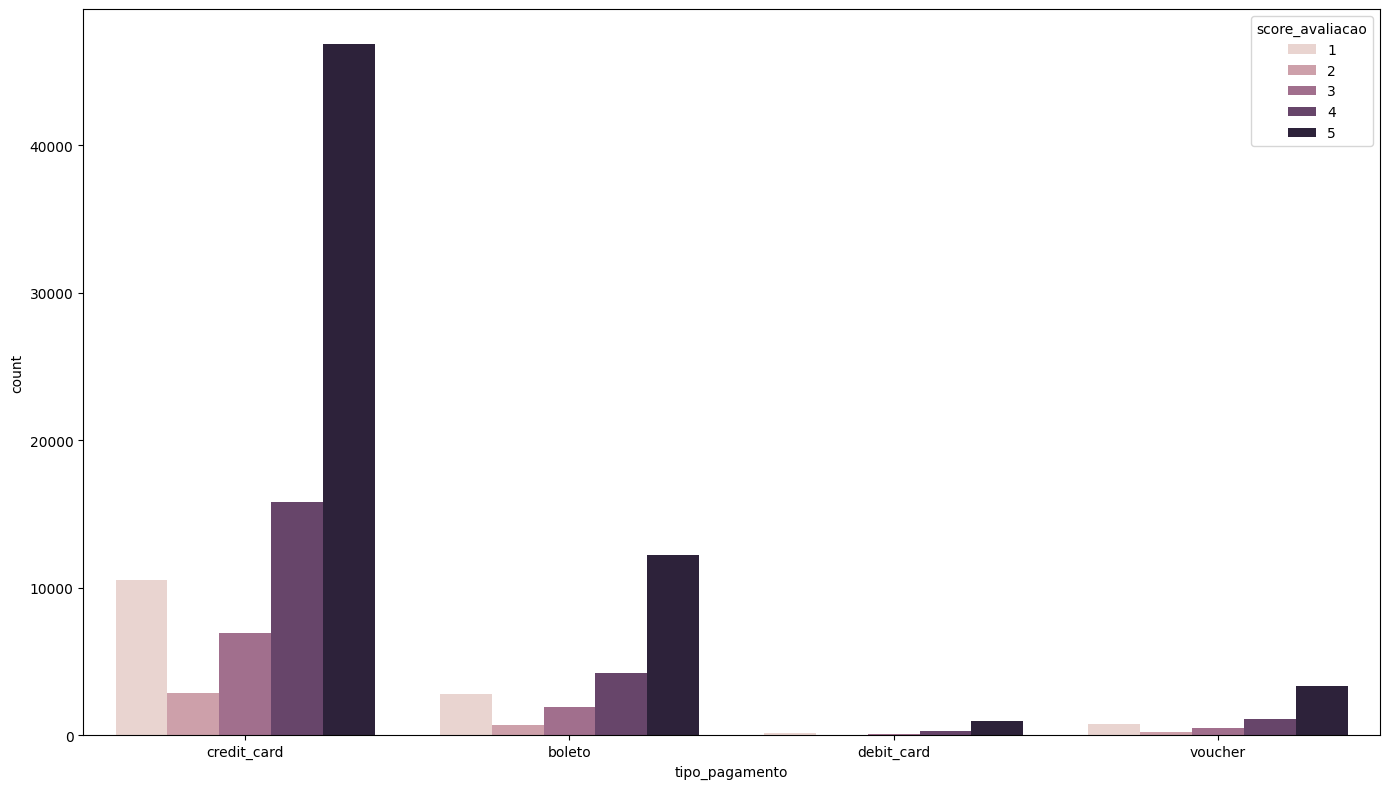

In [51]:
sns.countplot(data = df, x = "tipo_pagamento", hue = "score_avaliacao");

# Tratamento de Valores Nulos

In [52]:
df.isnull().sum()

id_pedido                     0
tipo_pagamento                0
prestacoes                    0
valor_pagamento               0
id_cliente                    0
status_pedido                 0
data_hora_pedido              0
pedido_aprovado              15
pedido_com_entregador      1180
pedido_entregue            2363
tempo_entregue_estimado       0
id_avaliacao                  0
score_avaliacao               0
data_avaliacao             4632
data_resposta_avaliacao    4632
id_item                       0
id_vendedor                   0
data_limite_entrega           0
preco                         0
valor_frete                   0
categoria_produto          1620
peso_produto                 18
comprimento_produto          18
altura_produto               18
largura_produto              18
cep_vendedor                  0
cidade_vendedor               0
estado_vendedor               0
id_unica_cliente              0
cep_cliente                   0
cidade_cliente                0
estado_c

- Tratamento de `pedido_aprovado`: valores NaT (not a time) mantidos; criação de flag para indicar se o pedido foi aprovado

In [53]:
df["pedido_aprovado_flag"] = df["pedido_aprovado"].notna().astype(int)

- Tratamento de `pedido_com_entregador`: valores NaT mantidos para evitar perda de dados e criação de flag

In [54]:
df["pedido_com_entregador_flag"] = df["pedido_com_entregador"].notna().astype(int)

- Tratamento de `pedido_entregue`: valores NaT mantidos e criação de flag

In [55]:
df["pedido_entregue_flag"] = df["pedido_entregue"].notna().astype(int)

- Tratamento de `data_avaliacao`: NaT mantido pois uma não avaliação pode ser relevante

In [56]:
df["avaliou_pedido"] = df["data_avaliacao"].notna().astype(int)

- Tratamento de `data_resposta_avaliacao`: NaT mantido

In [57]:
df["respondeu_avaliacao"] = df["data_resposta_avaliacao"].notna().astype(int)

- Tratamento de `categoria_produto`: dados faltantes preenchidos com `desconhecido` para evitar perda de dados

In [58]:
df["categoria_produto"].fillna("desconhecido", inplace=True)

- Tratamento dos atributos físicos do produto: variáveis numéricas passadas para uma lista

In [59]:
numerical_columns = [
    "peso_produto",
    "comprimento_produto",
    "altura_produto",
    "largura_produto"
]

- Imputação com a mediana de cada coluna

In [60]:
for column in numerical_columns:
    median = df[column].median()
    df[column].fillna(median, inplace=True)

- Feature Engineering

    - Cálculo de tempos de entrega e atraso

In [61]:
df["tempo_entrega_real"] = (df["pedido_entregue"] - df["pedido_aprovado"]).dt.total_seconds() / 3600
df["tempo_entrega_estimado"] = (df["tempo_entregue_estimado"] - df["pedido_aprovado"]).dt.total_seconds() / 3600
df["atraso_entrega_horas"] = df["tempo_entrega_real"] - df["tempo_entrega_estimado"]
df["pedido_atrasado"] = (df["atraso_entrega_horas"] > 0).astype(int)

    - Ajuste para pedidos não entregues

In [62]:
df.loc[df["pedido_entregue_flag"] == 0, "tempo_entrega_real"] = None
df.loc[df["pedido_entregue_flag"] == 0, "atraso_entrega_horas"] = None
df.loc[df["pedido_entregue_flag"] == 0, "pedido_atrasado"] = 0

    - Cálculo de tempos relacionados à aprovação e avaliação

In [63]:
df["tempo_ate_aprovacao"] = (
    df["pedido_aprovado"] - df["data_hora_pedido"]
).dt.total_seconds() / 3600

df["tempo_entrega_para_avaliacao"] = (
    df["data_avaliacao"] - df["pedido_entregue"]
).dt.total_seconds() / 3600

df["tempo_resposta_avaliacao"] = (
    df["data_resposta_avaliacao"] - df["data_avaliacao"]
).dt.total_seconds() / 3600

    - Ajuste de tempos para eventos ausentes

In [64]:
df.loc[df["pedido_aprovado_flag"] == 0, "tempo_ate_aprovacao"] = None
df.loc[df["avaliou_pedido"] == 0, "tempo_entrega_para_avaliacao"] = None
df.loc[df["respondeu_avaliacao"] == 0, "tempo_resposta_avaliacao"] = None

# Discussão sobre as escolhas para o tratamento de valores nulos
Valores nulos em datas (`pedido_aprovado`, `pedido_entregue`, `data_avaliacao`, etc.) foram mantidos como NaT, e flags binárias foram criadas para indicar a presença do evento, transformando ausência em informação. Colunas categóricas com nulos foram preenchidas com "desconhecido" e atributos numéricos com poucos nulos receberam a mediana para preservar a distribuição original e evitar distorção por outliers. Features derivadas de tempo (tempo até aprovação, tempo de entrega, atraso, tempo até avaliação e resposta) foram criadas para capturar padrões temporais relevantes à satisfação do cliente. Essa abordagem preserva a informação original e permite que o modelo aprenda relações importantes para prever o score de avaliação.

# Conversão das variaveis do tipo Object para Category

In [65]:
categorical_variables

['score_avaliacao',
 'cidade_cliente',
 'tipo_pagamento',
 'estado_cliente',
 'status_pedido',
 'categoria_produto']

In [66]:
df['cidade_cliente'] = df['cidade_cliente'].astype('category')
df['estado_cliente'] = df['estado_cliente'].astype('category')
df['categoria_produto'] = df['categoria_produto'].astype('category')
df['status_pedido'] = df['status_pedido'].astype('category')
df['tipo_pagamento'] = df['tipo_pagamento'].astype('category')

- Variáveis identificadoras e a variável alvo não são convertidas para o tipo category

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112492 entries, 0 to 112491
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   id_pedido                     112492 non-null  object        
 1   tipo_pagamento                112492 non-null  category      
 2   prestacoes                    112492 non-null  int64         
 3   valor_pagamento               112492 non-null  float64       
 4   id_cliente                    112492 non-null  object        
 5   status_pedido                 112492 non-null  category      
 6   data_hora_pedido              112492 non-null  datetime64[ns]
 7   pedido_aprovado               112477 non-null  datetime64[ns]
 8   pedido_com_entregador         111312 non-null  datetime64[ns]
 9   pedido_entregue               110129 non-null  datetime64[ns]
 10  tempo_entregue_estimado       112492 non-null  datetime64[ns]
 11  id_avaliacao 

In [68]:
numerical_variables

['prestacoes',
 'valor_pagamento',
 'preco',
 'valor_frete',
 'peso_produto',
 'comprimento_produto',
 'altura_produto',
 'largura_produto']

- Atualização da lista de variáveis numéricas após tratamento de valores nulos

In [69]:
numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()

In [70]:
numerical_variables

['prestacoes',
 'valor_pagamento',
 'score_avaliacao',
 'preco',
 'valor_frete',
 'peso_produto',
 'comprimento_produto',
 'altura_produto',
 'largura_produto',
 'pedido_aprovado_flag',
 'pedido_com_entregador_flag',
 'pedido_entregue_flag',
 'avaliou_pedido',
 'respondeu_avaliacao',
 'tempo_entrega_real',
 'tempo_entrega_estimado',
 'atraso_entrega_horas',
 'pedido_atrasado',
 'tempo_ate_aprovacao',
 'tempo_entrega_para_avaliacao',
 'tempo_resposta_avaliacao']

In [71]:
len(numerical_variables)

21

- Visualização dos boxplots de variáveis numéricas para identificação de possíveis outliers. É necessário avaliar cada uma das variáveis dentro do contexto dos dados para decidir se elas realmente serão tratadas como outliers.

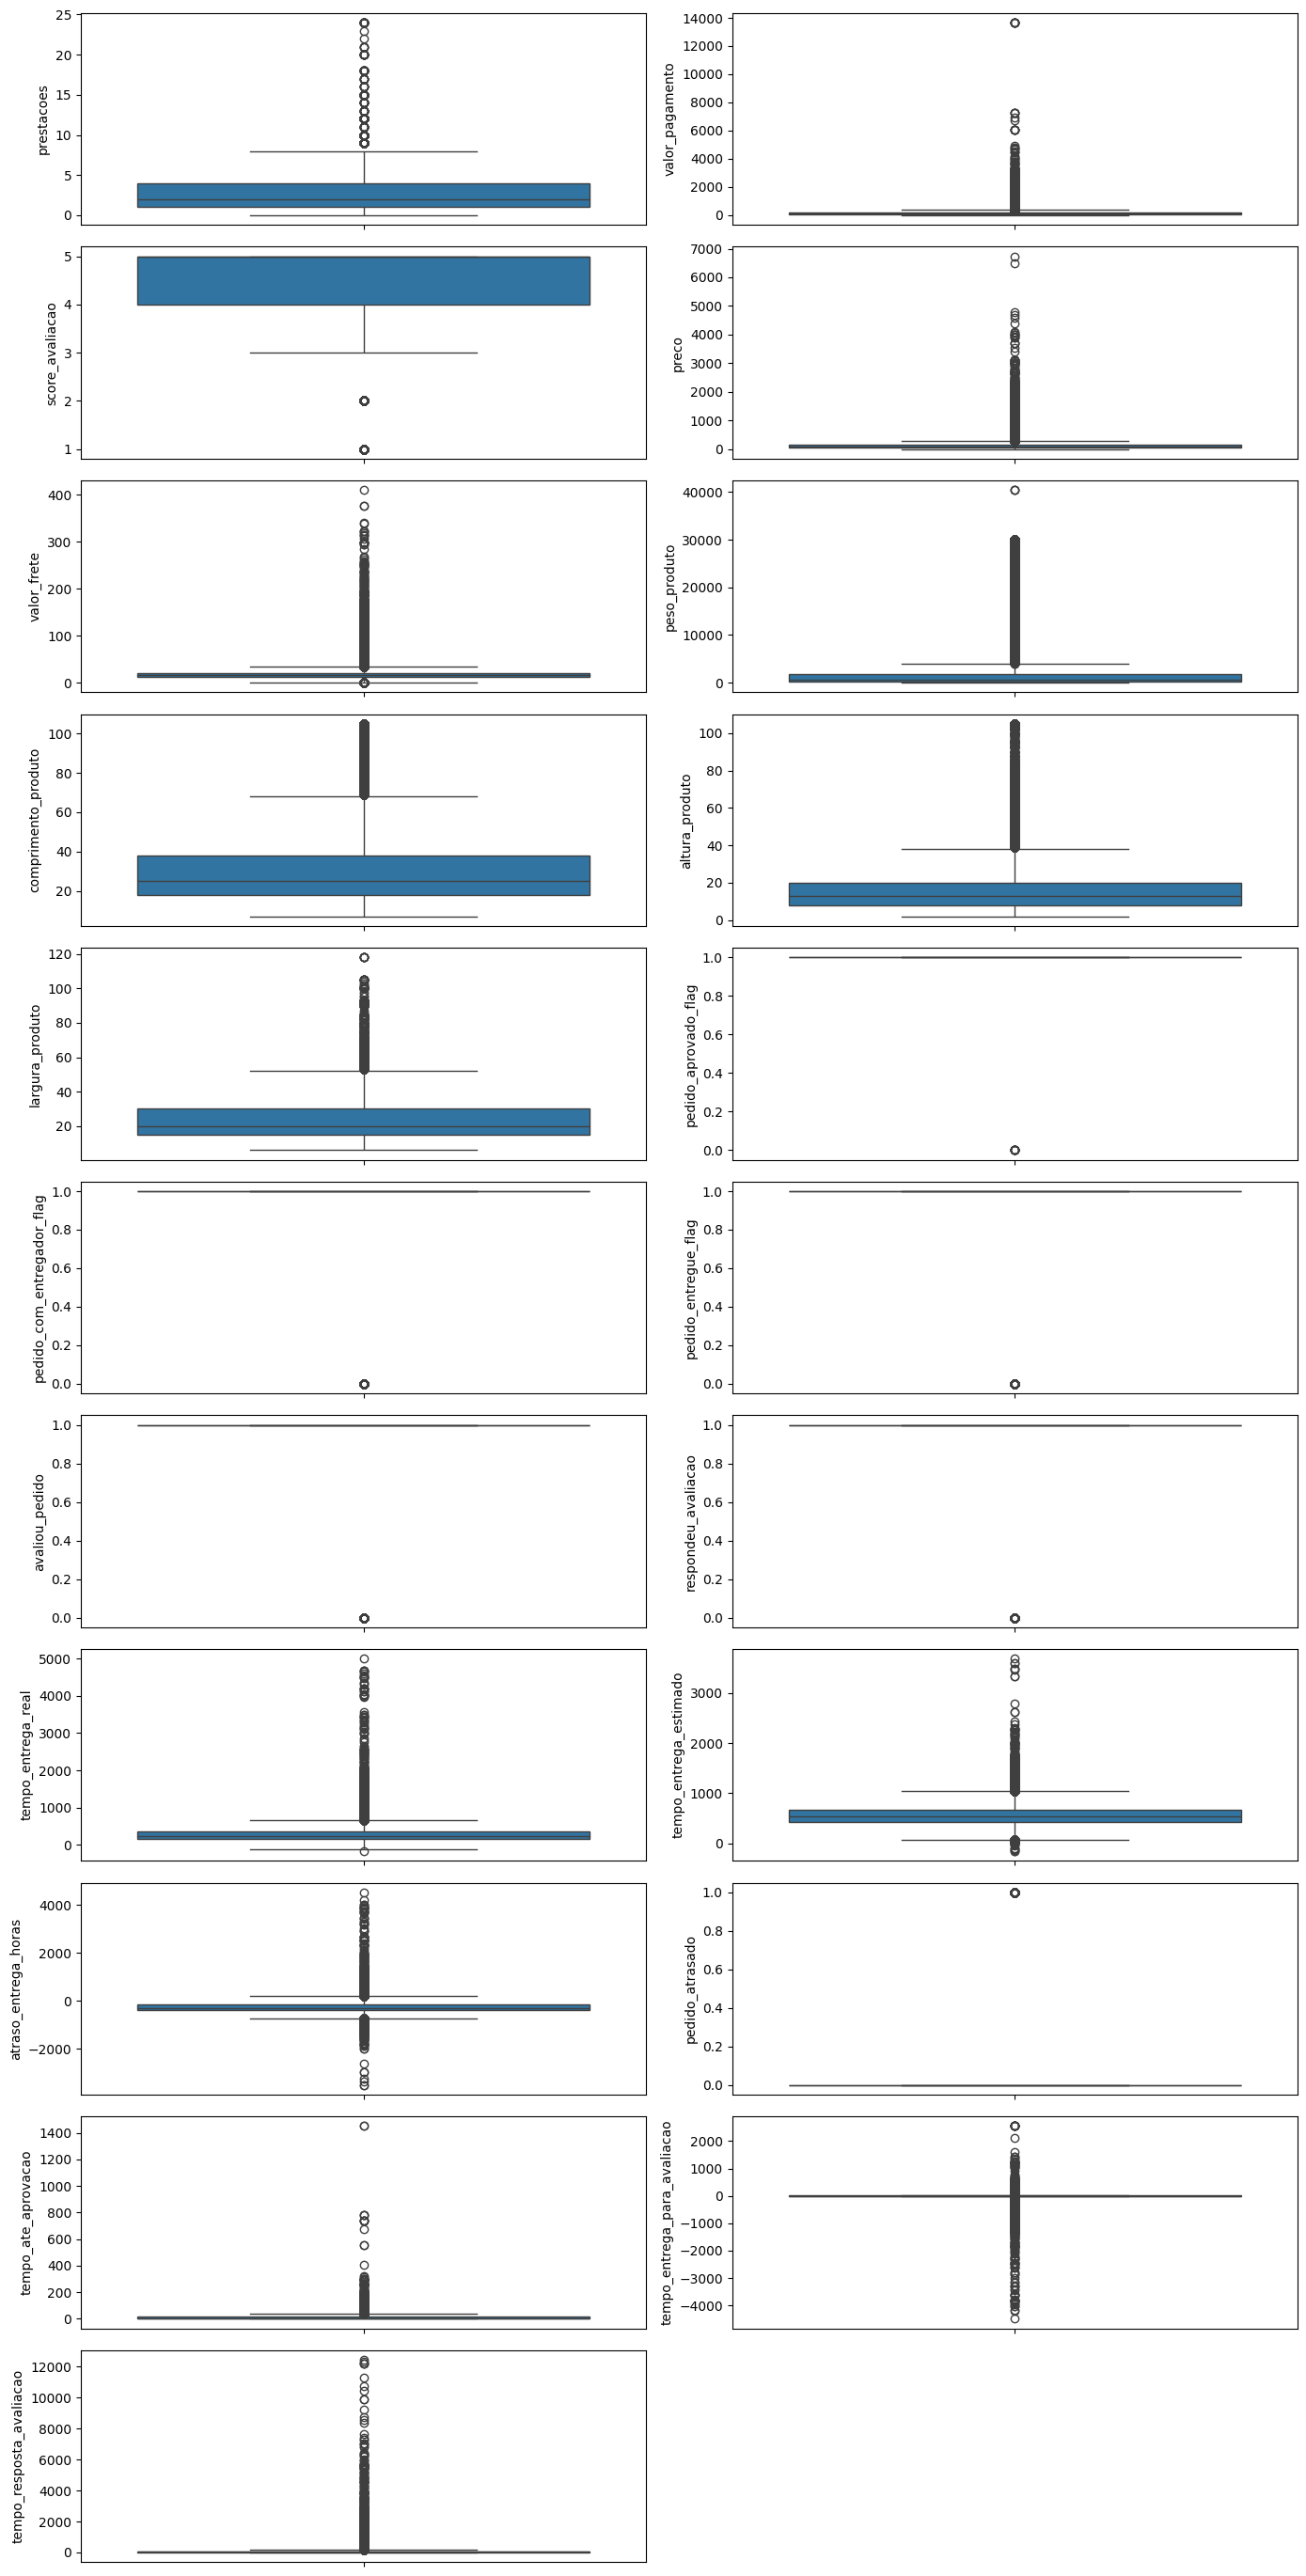

In [72]:
import math

n = len(numerical_variables)
cols = 2
rows = math.ceil(n / cols)

plt.rcParams["figure.figsize"] = [14.00, 2.5 * rows]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(rows, cols)

axes = axes.flatten()

for idx, var in enumerate(numerical_variables):
    sns.boxplot(data=df, y=var, ax=axes[idx])

for j in range(idx + 1, len(axes)):
    f.delaxes(axes[j])

- A visualização dos histogramas, assim como a dos boxplots, também permite analisar a distribuição dos dados e possíveis outliers

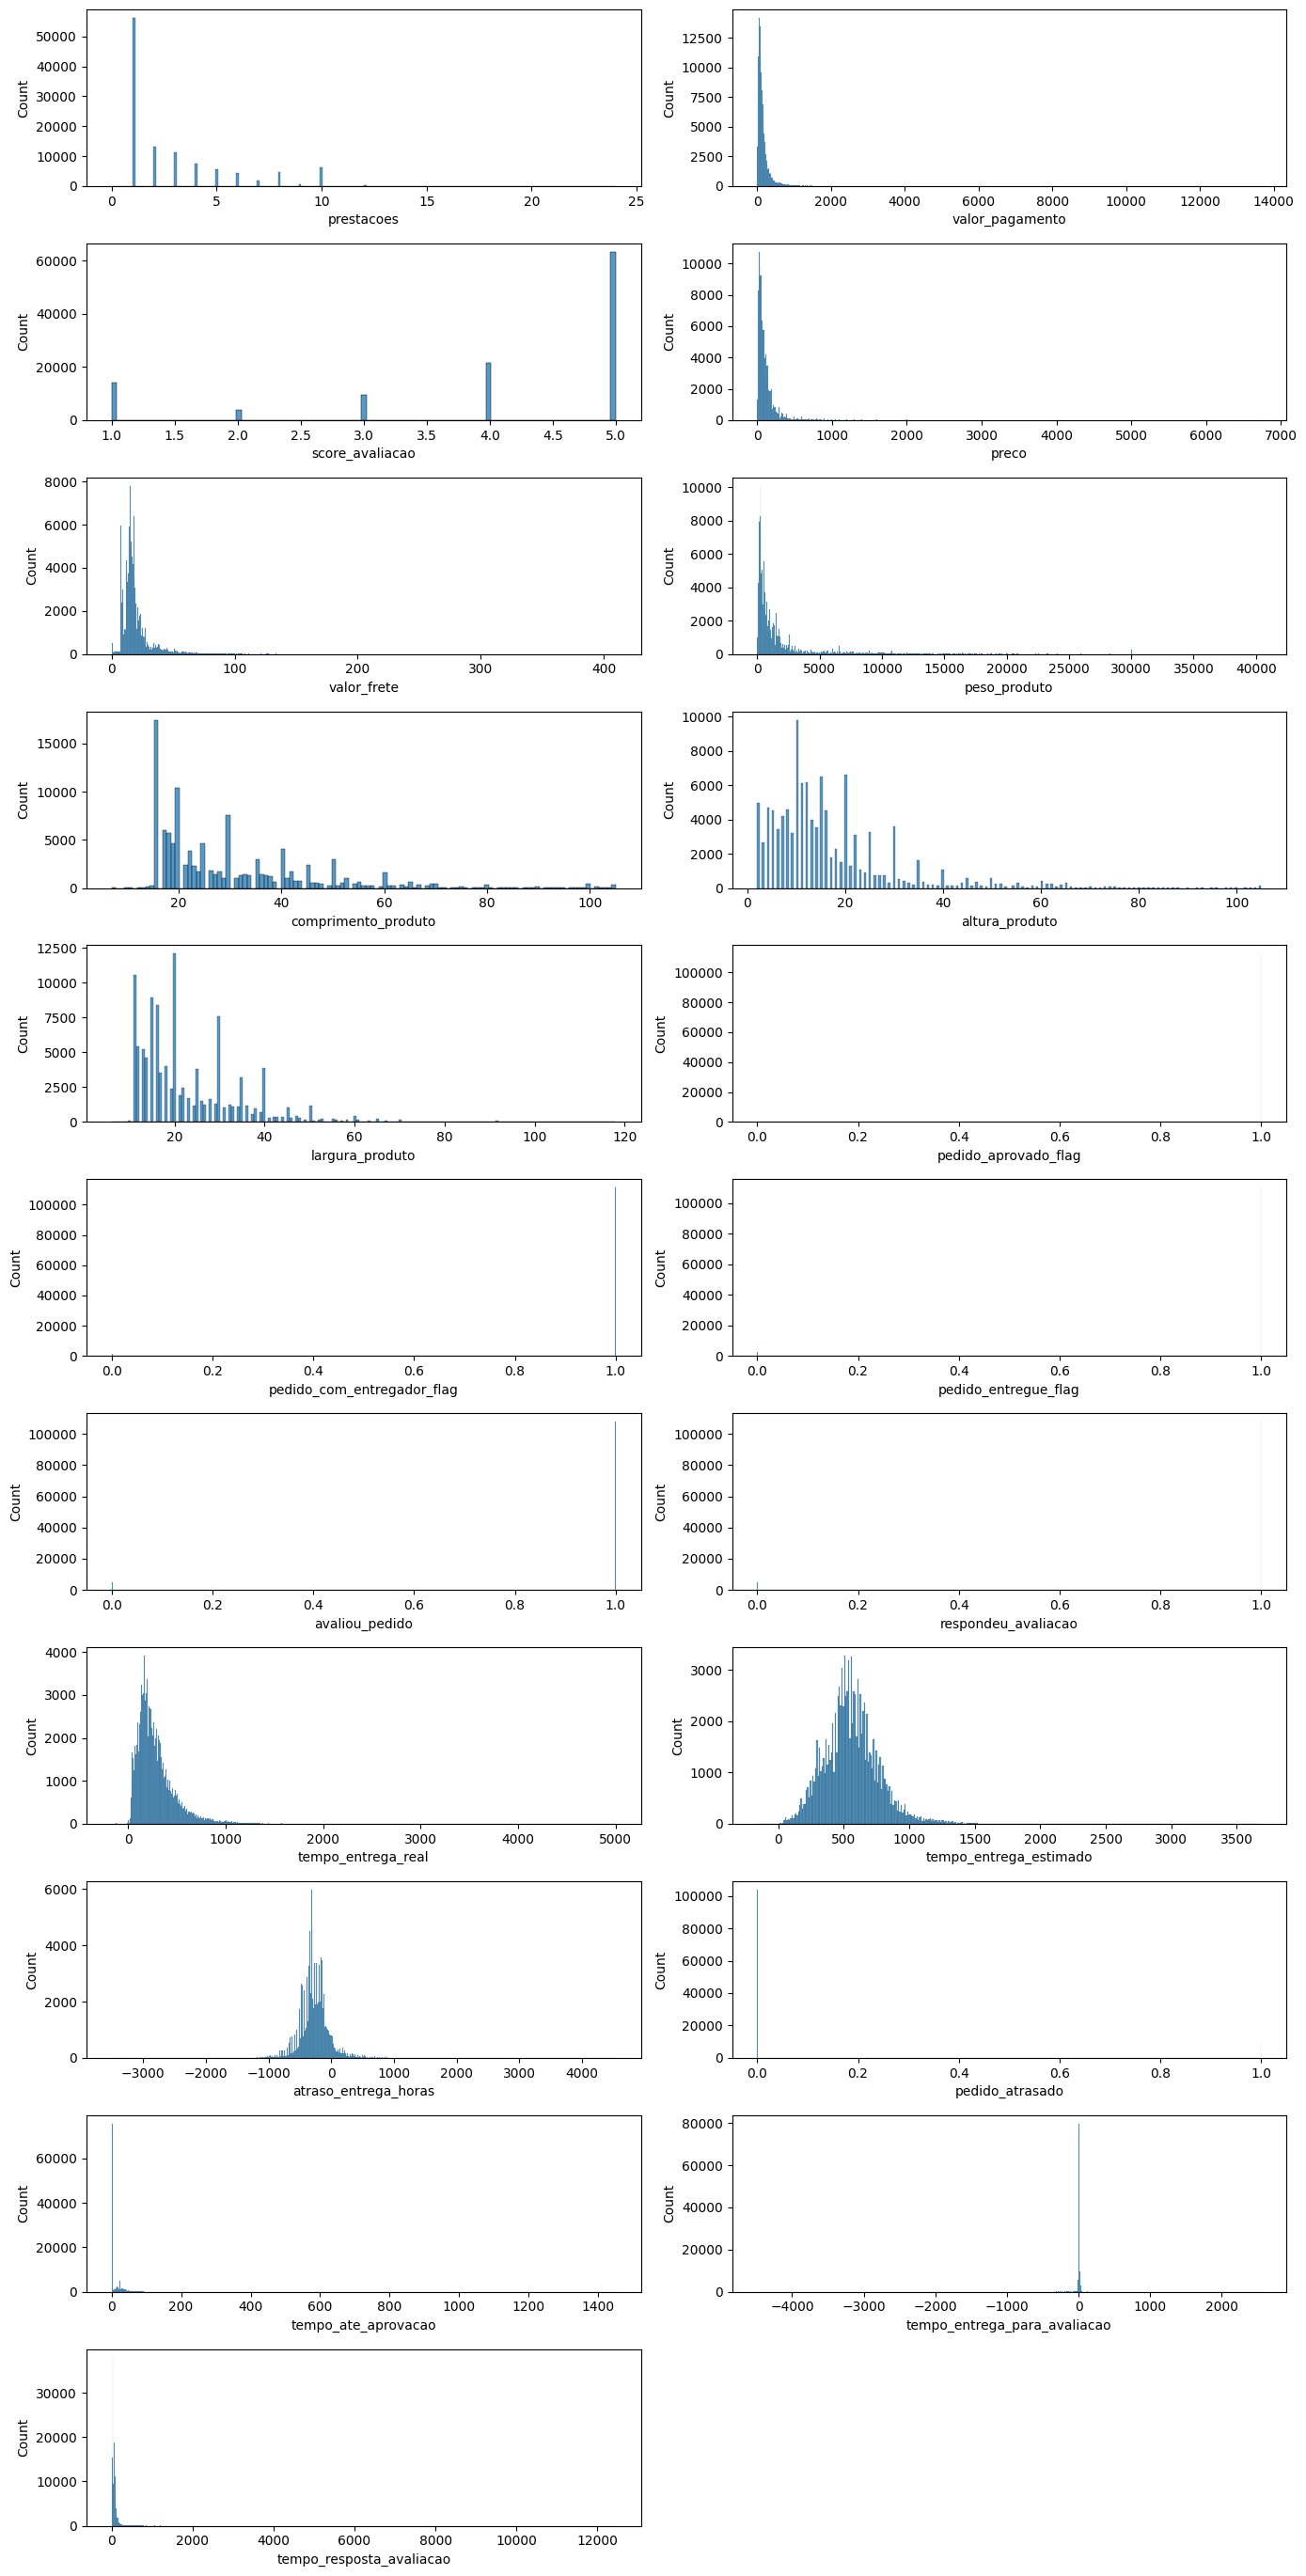

In [73]:
n = len(numerical_variables)
cols = 2
rows = math.ceil(n / cols)

plt.rcParams["figure.figsize"] = [14.00, 2.5 * rows]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(rows, cols)

axes = axes.flatten()

for idx, var in enumerate(numerical_variables):
    sns.histplot(data=df, x=var, ax=axes[idx])

for j in range(idx + 1, len(axes)):
    f.delaxes(axes[j])

- Durante a análise dos histogramas e boxplots, foi constatada a presença de valores negativos na coluna `tempo_entrega_real`:

In [74]:
df_negativos = df[df['tempo_entrega_real'] < 0]
df_negativos[['pedido_aprovado', 'pedido_entregue', 'tempo_entrega_real']].head(10)

,pedido_aprovado,pedido_entregue,tempo_entrega_real
3340,2018-07-05 16:40:30.029,2018-07-04 22:42:41.011,-17.96
3597,2018-07-05 16:34:40.022,2018-07-05 15:13:42.960,-1.35
4232,2018-07-28 23:31:01.027,2018-07-25 17:35:29.990,-77.93
4329,2018-04-24 18:30:08.957,2018-04-24 17:06:38.016,-1.39
5954,2018-04-24 18:59:18.989,2018-04-24 18:17:07.037,-0.70
8929,2018-08-20 15:55:42.038,2018-08-17 16:45:45.043,-71.17
12713,2018-02-03 23:31:57.965,2018-02-02 19:52:42.960,-27.65
12714,2018-02-03 23:31:57.965,2018-02-02 19:52:42.960,-27.65
13434,2018-04-24 18:40:03.994,2018-04-24 15:24:37.958,-3.26
13837,2018-07-27 23:30:58.003,2018-07-25 18:21:18.029,-53.16


- A inconsistência pode ter sido gerada após o tratamento de valores nulos, com a criação de variáveis derivadas, como é o caso de `tempo_entrega_real`. Com isso em vista, será investigada a proporção de registros negativos para que seja decidida a melhor abordagem diante disso

In [75]:
negatives = df[df['tempo_entrega_real'] < 0]
len(negatives)

69

In [76]:
len(negatives) / len(df) * 100

0.061337695124986664

- Visto que é uma quantidade pequena de registros e que pode indicar inconsistências de datas, é apropriado remover esses registros do dataset, para que o modelo não fique enviesado

In [81]:
df = df[df['tempo_entrega_real'] >= 0]

In [84]:
(df['tempo_entrega_real'] < 0).sum()

np.int64(0)

- Registros negativos em grande proporção também foram constatados em `atraso_entrega_horas`, que será investigado a seguir:

In [85]:
negatives = df[df['atraso_entrega_horas'] < 0]
len(negatives)

101475

In [86]:
len(negatives) / len(df) * 100

92.21227679585624

- O erro decorreu de cálculos baseados em datas inconsistentes durante a criação das flags, como ocorrências de `pedido_entregue` antes de `pedido_aprovado`. Assim, o cálculo de `atraso_entrega_horas`, feito em cima de valores inconsistentes anteriormente, amplificou esses valores. A abordagem a ser adotada será a correção da coluna através da criação de mais uma coluna derivada a ser usada no modelo, enquanto a original permanece para fins de referência e documentação 

    - Eliminação do cálculo para pedidos que não foram entregues

In [87]:
df['atraso_entrega_horas_corrigido'] = df['atraso_entrega_horas']
df.loc[df['pedido_entregue_flag'] == 0, 'atraso_entrega_horas_corrigido'] = None
df['pedido_atrasado_corrigido'] = (df['atraso_entrega_horas_corrigido'] > 0).astype(int)
df.loc[df['pedido_entregue_flag'] == 0, 'pedido_atrasado_corrigido'] = 0

    - Transformação de negativos em zero, mantendo os registros

In [88]:
df['atraso_entrega_horas_corrigido'] = df['atraso_entrega_horas_corrigido'].clip(lower=0)

In [90]:
negatives = df[df['atraso_entrega_horas_corrigido'] < 0]
len(negatives)

0

- Com isso feito, segue a visualização da relação entre o tempo de entrega e a satisfação dos clientes

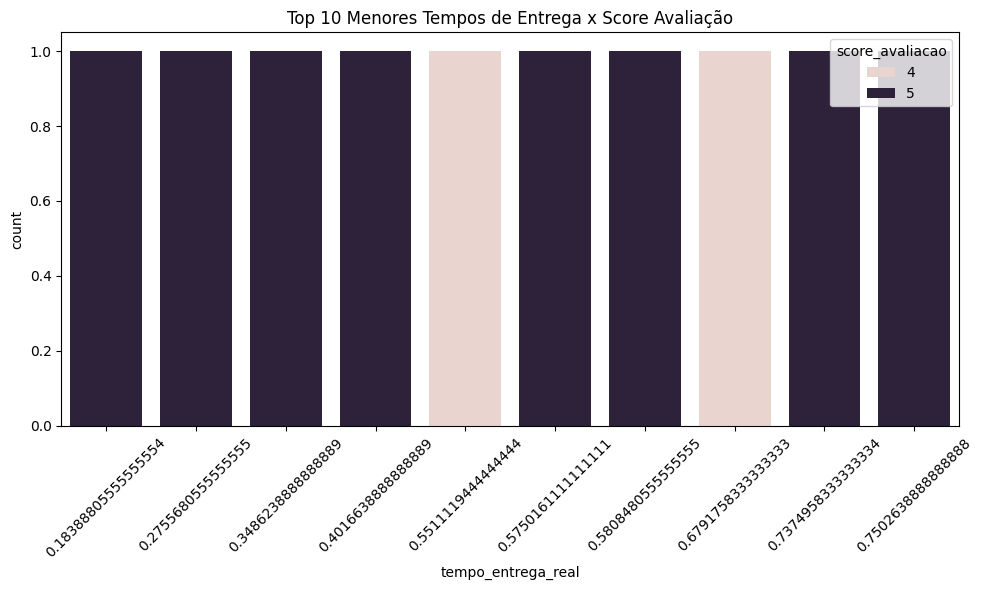

In [91]:
import matplotlib.ticker as ticker

df_menores_tempos = df[df['tempo_entrega_real'].notnull()].sort_values('tempo_entrega_real', ascending=True).head(10)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_menores_tempos, x="tempo_entrega_real", hue="score_avaliacao")
plt.title("Top 10 Menores Tempos de Entrega x Score Avaliação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

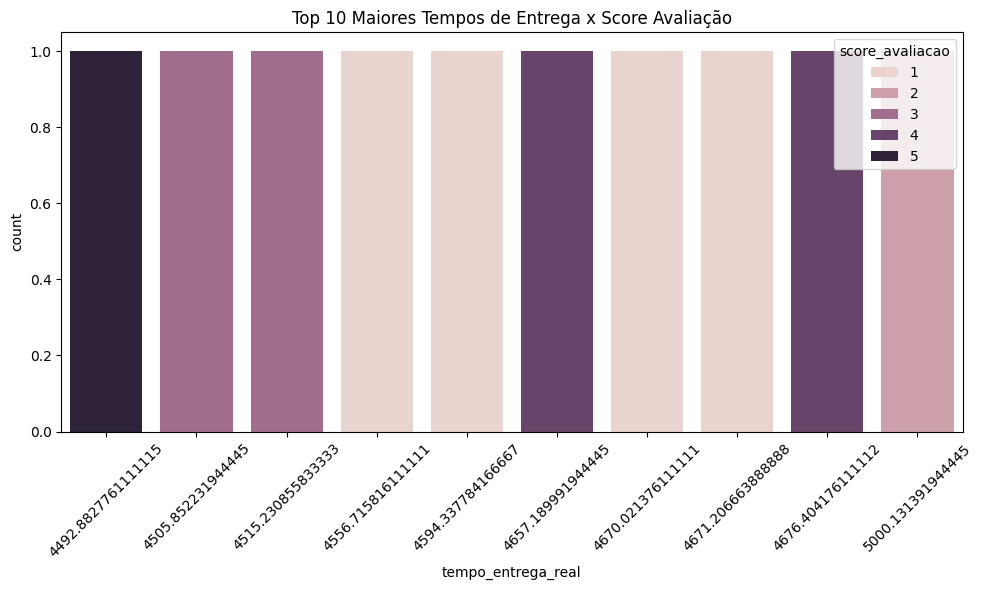

In [92]:
df_maiores_tempos = df[df['tempo_entrega_real'].notnull()].sort_values('tempo_entrega_real', ascending=True).tail(10)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_maiores_tempos, x="tempo_entrega_real", hue="score_avaliacao")
plt.title("Top 10 Maiores Tempos de Entrega x Score Avaliação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Visualização da relação entre tempo de atraso e satisfação dos clientes

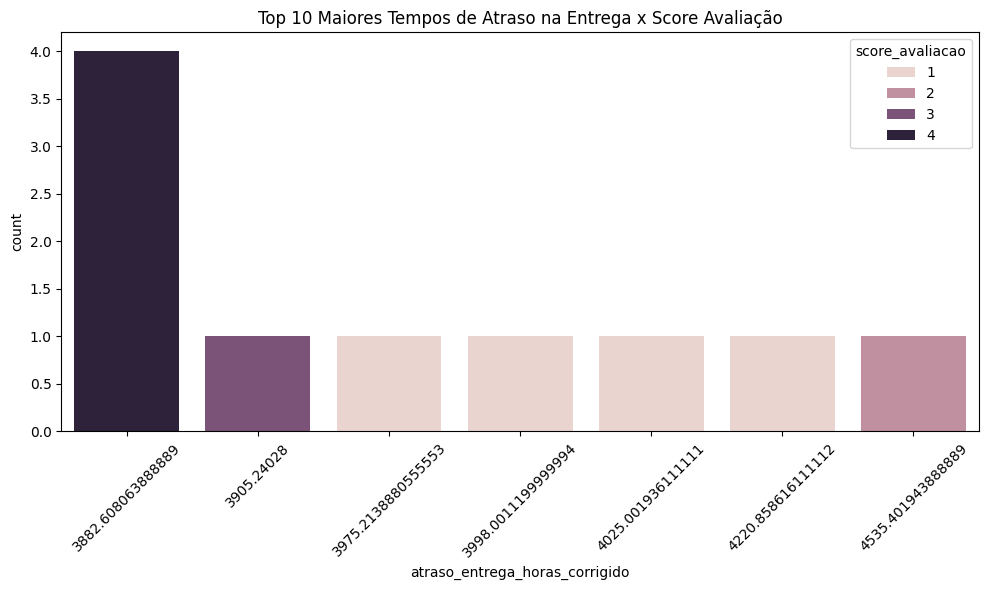

In [93]:
df_maiores_tempos = df[df['atraso_entrega_horas_corrigido'].notnull()].sort_values('atraso_entrega_horas_corrigido', ascending=True).tail(10)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_maiores_tempos, x="atraso_entrega_horas_corrigido", hue="score_avaliacao")
plt.title("Top 10 Maiores Tempos de Atraso na Entrega x Score Avaliação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

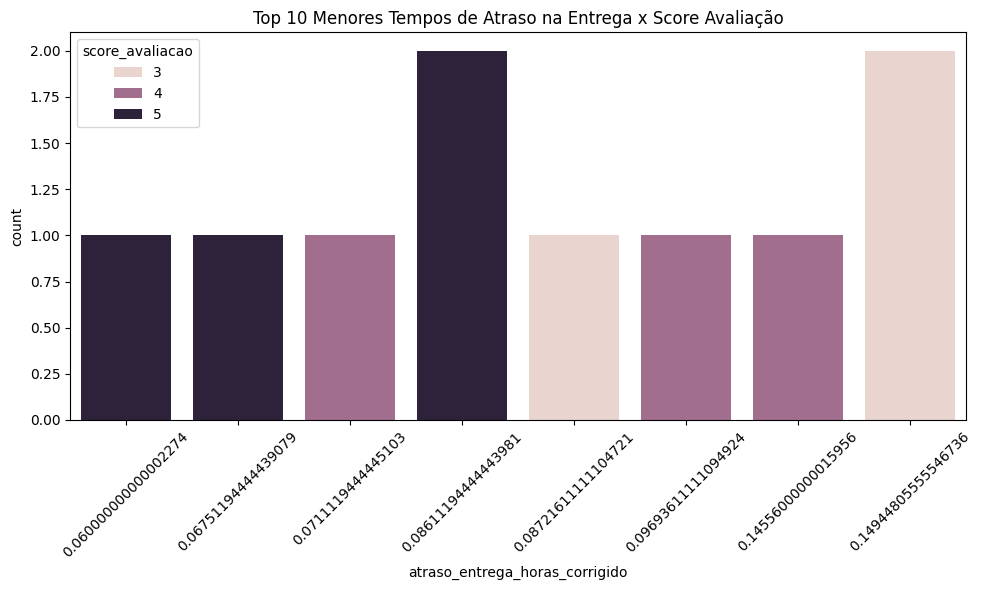

In [94]:
df_maiores_tempos = df[
    (df['atraso_entrega_horas_corrigido'].notnull()) &
    (df['atraso_entrega_horas_corrigido'] > 0)
].sort_values('atraso_entrega_horas_corrigido', ascending=True).head(10)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_maiores_tempos, x="atraso_entrega_horas_corrigido", hue="score_avaliacao")
plt.title("Top 10 Menores Tempos de Atraso na Entrega x Score Avaliação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights sobre o Impacto do Tempo de Entrega e Atraso na Satisfação do Cliente
A análise dos gráficos sugere uma relação entre o tempo de entrega dos pedidos, o atraso na entrega e a satisfação dos clientes, medida pelo score de avaliação. Menores tempos de entrega estão associados a avaliações altas (scores 4 e 5). Não foram observadas avaliações baixas entre os pedidos entregues mais rapidamente, indicando que a agilidade pode ser um fator relevante para a satisfação do cliente. Já os maiores tempos de entrega apresentaram uma maior diversidade de scores, incluindo avaliações baixas (scores 1, 2 e 3), o que sugere que atrasos significativos podem aumentar a insatisfação dos clientes. Em relação aos atrasos na entrega, os grandes parecem estar ligados a avaliações negativas, com predominância de scores baixos e ausência de avaliações máximas. Esse padrão reforça que atrasos expressivos podem impactar negativamente a experiência do cliente. Pequenos atrasos, por sua vez, são mais tolerados: a maioria dos pedidos com atrasos mínimos ainda recebe avaliações altas, mostrando que atrasos pequenos não comprometem de forma relevante a satisfação do cliente. Esses resultados destacam a importância de processos logísticos eficientes e do cumprimento dos prazos de entrega para garantir a satisfação dos clientes e, consequentemente, melhores resultados para o negócio.

- Visualização das variáveis categóricas

In [95]:
categorical_variables

['score_avaliacao',
 'cidade_cliente',
 'tipo_pagamento',
 'estado_cliente',
 'status_pedido',
 'categoria_produto']

- Remoção de `score_avaliacao` (variável alvo) da lista de variáveis categóricas

In [96]:
categorical_variables.remove('score_avaliacao')

In [97]:
categorical_variables

['cidade_cliente',
 'tipo_pagamento',
 'estado_cliente',
 'status_pedido',
 'categoria_produto']

- Importação do pacote LabelEncoder e aplicação do OneHotEncoder sobre variáveis categóricas

In [98]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for var in categorical_variables:
    df[var] = lb.fit_transform(df[var])

- Visualização dos tipos de variáveis após transformação dos dados

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110045 entries, 0 to 112491
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id_pedido                       110045 non-null  object        
 1   tipo_pagamento                  110045 non-null  int64         
 2   prestacoes                      110045 non-null  int64         
 3   valor_pagamento                 110045 non-null  float64       
 4   id_cliente                      110045 non-null  object        
 5   status_pedido                   110045 non-null  int64         
 6   data_hora_pedido                110045 non-null  datetime64[ns]
 7   pedido_aprovado                 110045 non-null  datetime64[ns]
 8   pedido_com_entregador           110044 non-null  datetime64[ns]
 9   pedido_entregue                 110045 non-null  datetime64[ns]
 10  tempo_entregue_estimado         110045 non-null  datetime64[n

In [100]:
df.head()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente,pedido_aprovado_flag,pedido_com_entregador_flag,pedido_entregue_flag,avaliou_pedido,respondeu_avaliacao,tempo_entrega_real,tempo_entrega_estimado,atraso_entrega_horas,pedido_atrasado,tempo_ate_aprovacao,tempo_entrega_para_avaliacao,tempo_resposta_avaliacao,atraso_entrega_horas_corrigido,pedido_atrasado_corrigido
0,05d5a67b06f86425711075939a164657,1,1,18.38,716c95338343be76a421f05145f6d9b7,1,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,2017-11-06,5064d6d99510e06a10487f7773f79060,4,2017-10-27,2017-10-27 17:13:20.000,2a592642399b33baf3a5729a6335b21c,b83cedfb587e7911540e3f576d6917ce,2017-10-30 09:28:15.000,9.99,7.78,63,100.00,16.00,7.00,12.00,4870,sao paulo,SP,b4acaca510f847f9927914b51f9b0874,9861,3359,25,1,1,1,1,1,52.76,302.53,-249.77,0,0.18,9.77,17.22,0.00,0
1,b1f9820e61b6a6a7643c961eaf4f217d,1,1,28.23,6e550daa4d9d07414a598ee4682289a0,1,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,2018-05-07,f86e7499e15b26ac97f22354ef917bd1,5,2018-04-17,2018-04-18 12:46:56.986,499a1638595575721fec87dbaa05f339,25cf099de44674fde97473224f9d59ab,2018-04-13 18:31:31.987,10.00,18.23,8,350.00,20.00,15.00,15.00,6716,cotia,SP,9abf4d8d20ca191ce59eb6227cf53d6d,38270,691,10,1,1,1,1,1,167.57,653.47,-485.91,0,0.42,5.91,36.78,0.00,0
2,b27f6a3ed9bfe29879c912b10bcf081b,1,9,92.57,dd774d127953e12f6953a9d36e6a3cc4,1,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,2018-01-24,a5fc2433140223de219d3fcfc548f3ff,4,2018-01-17,2018-01-22 10:00:16.963,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2018-01-08 20:50:16.022,79.00,13.57,60,"7,000.00",60.00,20.00,30.00,13232,campo limpo paulista,SP,dc446a1ea0c8cc3eb1cd31896f6cf00f,12919,541,25,1,1,1,1,1,336.04,507.16,-171.12,0,0.29,3.12,130.00,0.00,0
3,a182c021b0561e70031de925b3991fb3,1,4,176.99,1d93c38087f43927ad29cdbd73a1a01b,1,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,2018-04-25,bdd2176b8d0ed0d5414dc07547720dd2,5,2018-04-12,2018-04-16 12:09:10.022,6f3b5b605d91b7439c5e3f5a8dffeea7,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-06 20:35:17.030,158.00,18.99,67,335.00,17.00,11.00,16.00,14840,guariba,SP,14691264ea396cd3bd71ebbe36bc6771,29278,228,7,1,1,1,1,1,206.65,531.41,-324.76,0,0.16,12.76,108.15,0.00,0
4,8e76f4ac6aee1d6013e40279de68a7cf,1,10,110.56,e085989aa21e36b90469d6940aefe23c,1,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,2017-08-31,44b50a1399e3b7c7b553984d2151fbc4,4,2017-08-16,2017-08-17 00:34:48.979,8cbd33515c33f6bc2042660baff504b5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-10 18:10:09.034,40.18,15.10,55,650.00,50.00,7.00,33.00,14940,ibitinga,SP,06c211500493e0aa2c584346c15a1d81,95770,1306,22,1,1,1,1,1,241.83,605.83,-364.00,0,0.29,4.00,24.58,0.00,0
